In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv', index_col=0)
df.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
Year,,,,,,,,,,,,,,,,
2010,35,7.542535,6.630073,39,46,1.193810,0.032204,70,33,13,22,1.419332,1.671324,9.311312,0.270434,0.194332
2010,13,1.617642,6.477132,45,18,8.484718,-4.803485,69,67,57,63,3.048794,5.815305,4.698086,0.729916,0.525779
2010,10,0.904817,9.069428,28,59,3.412444,-2.563852,72,85,37,46,7.863218,9.543694,2.080495,0.068508,0.684795
2010,36,7.060190,7.061932,37,88,9.718453,3.425382,64,85,96,60,1.065595,4.938359,2.192657,0.145065,0.926146
2010,24,8.439246,4.504786,41,88,9.118186,-1.295086,12,0,85,61,9.785784,2.114002,7.405189,0.809798,0.126345


In [ ]:
df.shape

(1000, 16)

In [ ]:
# Split data into predictors and response
X = df.drop('BiodiversityHealthIndex', axis=1)
y = df['BiodiversityHealthIndex']

In [ ]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create scaler object
scaler = StandardScaler()

In [ ]:
# Create scaler object
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convert the scaled predictor values into a DataFrame
X_standardised = pd.DataFrame(X_scaled, columns=X.columns)
X_standardised.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
0,-0.509823,0.915895,0.532798,0.967295,-0.129430,-1.297085,0.017923,0.689812,-0.641157,-1.290990,-0.930835,-1.237558,-1.131411,1.494660,-0.811078
1,-1.261473,-1.159761,0.479063,1.382383,-1.098165,1.226669,-1.649745,0.655167,0.539995,0.207271,0.470716,-0.670150,0.305779,-0.107952,0.797582
2,-1.363971,-1.409483,1.389846,0.206299,0.320340,-0.529103,-0.877370,0.759101,1.165311,-0.473757,-0.110415,1.006319,1.598836,-1.017291,-1.518029
3,-0.475658,0.746916,0.684528,0.828932,1.323673,1.653728,1.188117,0.481943,1.165311,1.535274,0.368164,-1.360736,0.001642,-0.978326,-1.249998
4,-0.885648,1.230038,-0.213905,1.105658,1.323673,1.445945,-0.439815,-1.319584,-1.787570,1.160709,0.402348,1.675792,-0.977884,0.832482,1.077254


In [ ]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardised,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [ ]:
# Create ridge model with alpha = 1
ridge = Ridge(alpha=1)

In [ ]:
# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [ ]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [ ]:
print("Intercept:", float(b0))

Intercept: 0.49766725116491456


In [ ]:
# Check out the coefficients
coeff

,Coefficient
WaterQualityIndex,0.010973
ClimateChangeImpactScore,-0.001669
LandUseChange,0.010856
InvasiveSpeciesCount,0.008450
ConservationFunding,-0.017984
EcoTourismImpact,-0.012543
ForestCoverChange,-0.020263
SoilQualityIndex,0.004408
WaterUsage,-0.005232
RenewableEnergyUsage,-0.005750


In [ ]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
lm = LinearRegression()

# Train model
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Import metrics module
from sklearn import metrics

In [ ]:
# Check training accuracy
train_lm = lm.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 0.08105319493006682
Ridge : 0.08105319766596189


In [ ]:
test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 0.08290391730908876
Ridge : 0.08289914315289104


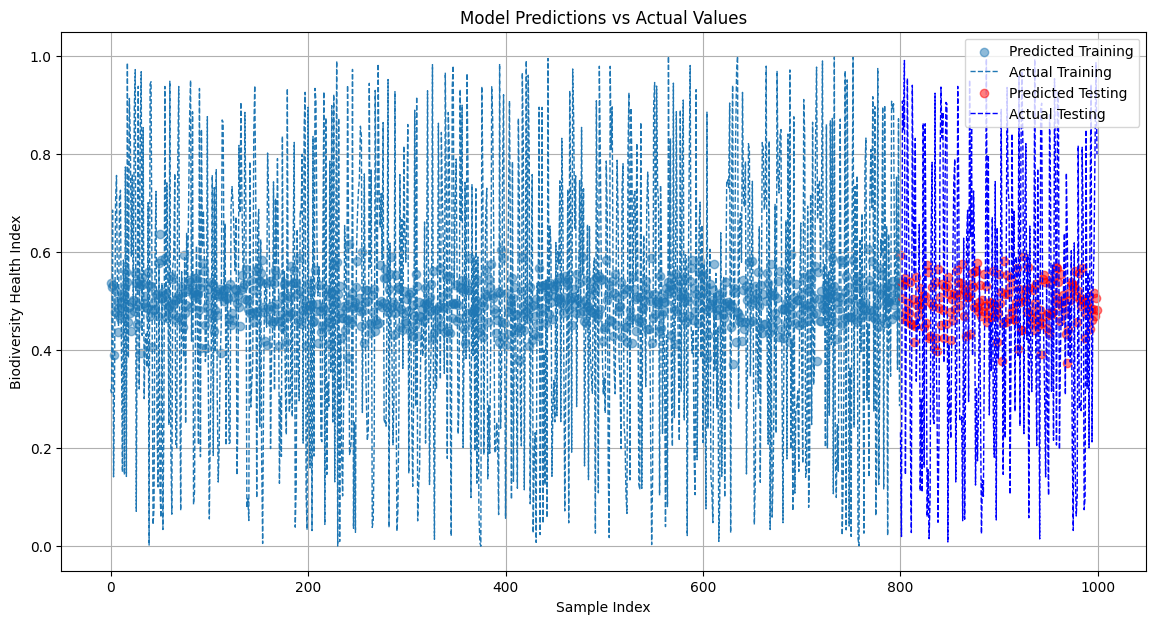

In [ ]:
# Predictions
y_pred_train = ridge.predict(X_standardised.iloc[:len(y_train)])
y_pred_test = ridge.predict(X_standardised.iloc[len(y_train):])

plt.figure(figsize=(14, 7))  # Plot size

# Plot training predictions and actual values
plt.scatter(np.arange(len(y_train)), y_pred_train, label='Predicted Training', alpha=0.5)
plt.plot(np.arange(len(y_train)), y_train, label='Actual Training', linestyle='--', linewidth=1)

# Plot testing predictions and actual values
plt.scatter(np.arange(len(y_test)) + len(y_train), y_pred_test, label='Predicted Testing', alpha=0.5, color='red')
plt.plot(np.arange(len(y_test)) + len(y_train), y_test, label='Actual Testing', linestyle='--', linewidth=1, color='blue')

plt.legend()
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Biodiversity Health Index')
plt.grid(True)  # Add gridlines

plt.show()